In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pathlib import Path
from sklearn.utils import Bunch
from skimage.io import imread
from skimage.transform import resize

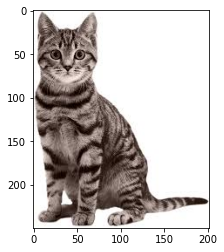

In [2]:
img = plt.imread('Downloads/Images_of_Cat_n_Dog/Image_ML/CAT/9.jpg')
plt.imshow(img)

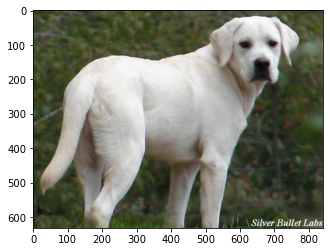

In [6]:
edges = filters.sobel(img)
plt.imshow(img)

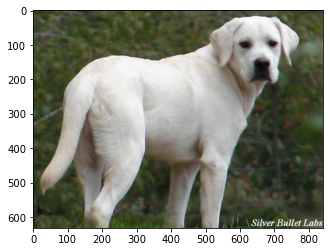

In [4]:
img = plt.imread('Downloads/Images_of_Cat_n_Dog/Image_ML/Dog/9.jpg')
plt.imshow(img)

In [5]:
from skimage import io, filters

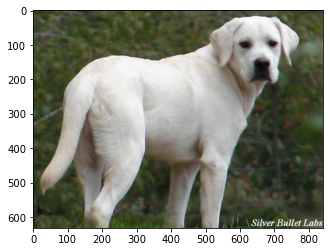

In [83]:
edges = filters.sobel(img)
plt.imshow(img)

In [7]:
def load_image_files(container_path, dimension=(64, 64)):
    
    """Loading Multiple Images From the Folder and Which Consists  of Different Shape of Data We Have to Bring them in 64 ,64 Shape
    as well as 
    Parameters
    ----------
    container_path : string or unicode of images in the SubFolders Path to the main folder holding one subfolder[Cat,Dog] 
    Each and Every category[Cat, Dog]
    Dimensions: We Have Bring Ddifferent Images into Same equal shape
    """
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr ="""cat and Dog Image Classification Problem"""
    
    images = []
    flat_data = []
    target = []
    
    for i,direc in enumerate(folders):
        for file in direc.iterdir():
            img = skimage.io.imread(file)
            plt.imshow(img)
            #plt.show()
            
            # Convert Image Sahpe in 64 ,64
            img_resized =resize(img, dimension, anti_aliasing=True, mode='reflect')
            plt.imshow(img_resized)
            flat_data.append(img_resized.flatten())
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)
    return Bunch(data=flat_data,
                target=target,
                target_name = categories,
                images= images,
                DESCR =descr )

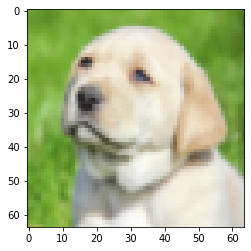

In [11]:
import skimage
image_dataset = load_image_files("Downloads/Images_of_Cat_n_Dog/Image_ML/Dog")

In [12]:
image_dataset.keys()

dict_keys(['data', 'target', 'target_name', 'images', 'DESCR'])

In [13]:
image_dataset.data

array([[0.20784314, 0.24485294, 0.13504902, ..., 0.45765931, 0.51053922,
        0.42394684],
       [0.47242647, 0.64691234, 0.22745098, ..., 0.83137255, 0.81176471,
        0.78615196]])

In [14]:
image_dataset.target

array([0, 1])

In [15]:
image_dataset.target_name

['0', '1']

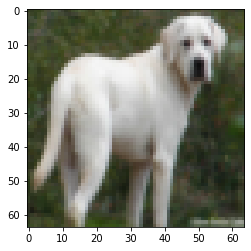

In [19]:
for I in range(0,1):
    plt.imshow(image_dataset.images[I])
    plt.show()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(image_dataset.data,image_dataset.target,random_state=1)
x_train.shape

(1, 12288)

In [22]:
x_test.shape

(1, 12288)

In [23]:
y_train.shape

(1,)

In [24]:
from sklearn.linear_model import LogisticRegression

In [40]:
Lr = LogisticRegression(solver='newton-cg',C=1.0,max_iter=100)

In [41]:
Lr.fit(x_train,y_train)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [38]:
y_test

array([0])

In [39]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [43]:
Training_score = Lr.score(x_train,y_train)
Training_score

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [ ]:
Test_score = Lr.score(x_train,y_train)